In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('inline') # TkAgg


## Stromverbrauch (LWP Statistik)

In [2]:
filename = 'lwpstats.csv'
dataframe = pd.read_csv(filename, skipinitialspace=True)
dataframe["Datum"] = pd.to_datetime(dataframe['Datum'] + "0", format="%Y/%W%w")

In [3]:
np.set_printoptions(precision=3)

def show_stats(series):
    timedelta = series["Datum"].values[-1] - series["Datum"].values[0]
    verbrauch_total = series["Verbrauch"].sum()
    generierung_total = series["Generierung"].sum()
    betriebszeit = series["Datum"].values[-1] - series["Datum"].values[0]
    betriebszeit = int(betriebszeit / np.timedelta64(1,'h'))
    print("Stromverbrauch: {}kWh".format(verbrauch_total))
    print("Stromgenerierung: {}kWh".format(generierung_total))
    print("Betriebszeit:   {}h".format(betriebszeit))

    print("Leistung (Verbrauch) pro Stunde: {0:.2f}kW".format(verbrauch_total/betriebszeit))    
    print("Leistung (Generierung) pro Stunde: {0:.2f}kW".format(generierung_total/betriebszeit))

    print("Kosten (bei 40cent/kWh): {:.2f}EUR".format(verbrauch_total * 0.4))

### Statistik bis inkl. KW25 2025

In [4]:
df_pre = dataframe[:30] # bis inkl. kw25 2025
show_stats(df_pre)

Stromverbrauch: 22102kWh
Stromgenerierung: 19180kWh
Betriebszeit:   4872h
Leistung (Verbrauch) pro Stunde: 4.54kW
Leistung (Generierung) pro Stunde: 3.94kW
Kosten (bei 40cent/kWh): 8840.80EUR


### Statistik ab KW26 2025

In [5]:
df_pre = dataframe[30:] # bis inkl. kw25 2025
show_stats(df_pre)

Stromverbrauch: 1501kWh
Stromgenerierung: 4578kWh
Betriebszeit:   2856h
Leistung (Verbrauch) pro Stunde: 0.53kW
Leistung (Generierung) pro Stunde: 1.60kW
Kosten (bei 40cent/kWh): 600.40EUR


### Darstellung Verbrauch & Generierung & Betriebsstunden

/tmp/ipykernel_4359/2187432838.py:21: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend([p1, p2, p3], labels=["Generierung", "Verbrauch", "Betriebszeit"], bbox_to_anchor=(0.91, 1.05), loc="upper right")


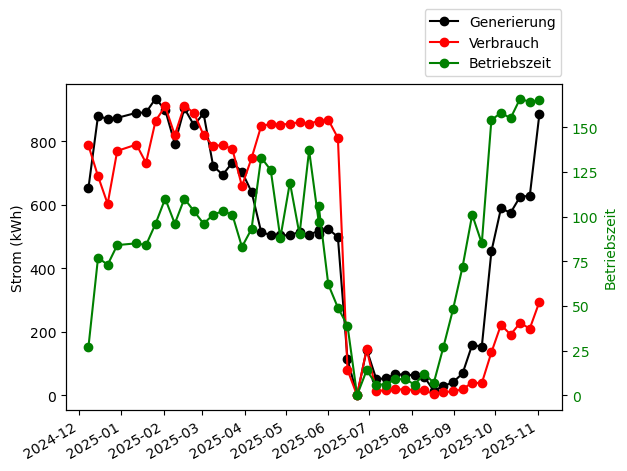

In [6]:
t = dataframe["Datum"]

data1 = dataframe["Generierung"]
data2 = dataframe["Verbrauch"]
data3 = dataframe["Betriebszeit"]

fig, ax1 = plt.subplots()

color = 'black'
ax1.set_ylabel('Strom (kWh)')
p1 = ax1.plot(t, data1, color=color, marker="o")
color = 'red'
p2 = ax1.plot(t, data2, color=color, marker="o")
 
color = 'green'
ax2 = ax1.twinx()
ax2.set_ylabel('Betriebszeit', color=color)
p3 = ax2.plot(t, data3, color=color, marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.legend([p1, p2, p3], labels=["Generierung", "Verbrauch", "Betriebszeit"], bbox_to_anchor=(0.91, 1.05), loc="upper right")
#fig.tight_layout()
fig.autofmt_xdate()
plt.show()

## Strom- & Gasverbrauch (Zähler)

In [7]:
filename = 'fuchsweg9.csv'
dataframe = pd.read_csv(filename, skipinitialspace=True)
dataframe["Datum"] = pd.to_datetime(dataframe['Datum'], format="%Y/%m/%d")

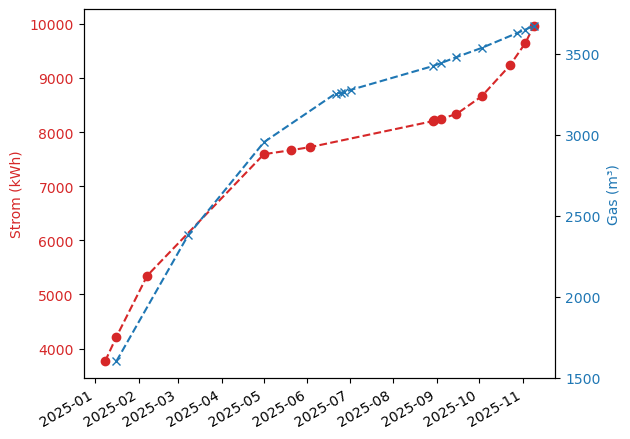

In [8]:
t = dataframe["Datum"]

data1 = dataframe["Strom Gemeinschaft Verbrauch"]
mask1 = np.isfinite(data1)
data2 = dataframe["Gas"]
mask2 = np.isfinite(data2)
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('Strom (kWh)', color=color)
ax1.plot(t[mask1], data1[mask1], color=color, marker="o", ls="--")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Gas (m³)', color=color)
ax2.plot(t[mask2], data2[mask2], color=color, marker="x", ls="--")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.autofmt_xdate()
plt.show()

### Gas-Kosten (bis und ab 21.06.2025)

In [11]:
gas_pre = dataframe["Gas"].values[11] # bis 21.06.2025
gas_now = dataframe["Gas"].values[-1]
gas_preis_pro_m3 = 0.90 # EUR

kosten_gas_pre = int(gas_pre * gas_preis_pro_m3)
kosten_gas_post = int((gas_now - gas_pre) * gas_preis_pro_m3)

print("Gas-Kosten ({}EUR/m³) bis Umbau: {}EUR".format(gas_preis_pro_m3, kosten_gas_pre))
print("Gas-Kosten ({}EUR/m³) ab Umbau: {}EUR".format(gas_preis_pro_m3, kosten_gas_post))

Gas-Kosten (0.9EUR/m³) bis Umbau: 2930EUR
Gas-Kosten (0.9EUR/m³) ab Umbau: 376EUR


### Strom-Kosten (bis und ab 03.06.2025)

In [12]:
strom_pre = dataframe["Strom Gemeinschaft Verbrauch"].values[10] # bis 03.06.2025
strom_now = dataframe["Strom Gemeinschaft Verbrauch"].values[-1]
strom_preis_pro_kwh = 0.40 # EUR

kosten_strom_pre = int(strom_pre * strom_preis_pro_kwh)
kosten_strom_post = int((strom_now - strom_pre) * strom_preis_pro_kwh)

print("Strom-Kosten ({}EUR/kWh) bis Umbau: {}EUR".format(strom_preis_pro_kwh, kosten_strom_pre))
print("Strom-Kosten ({}EUR/kWh) ab Umbau: {}EUR".format(strom_preis_pro_kwh, kosten_strom_post))

Strom-Kosten (0.4EUR/kWh) bis Umbau: 3089EUR
Strom-Kosten (0.4EUR/kWh) ab Umbau: 896EUR
